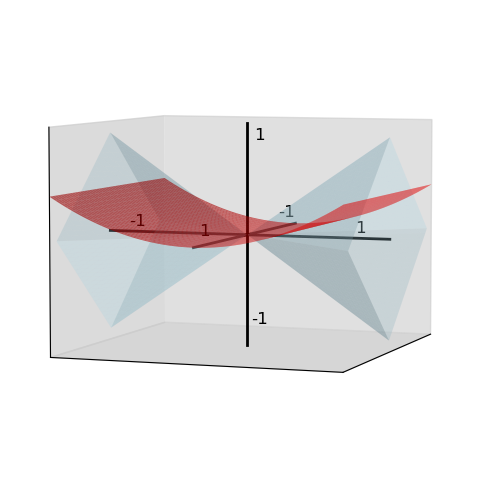

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

def generate_3d_cone(alpha=1, resolution=100):
    """
    Generuje dane dla zbioru spełniającego nierówność |x| + |z| <= alpha * |y| w przestrzeni 3D.
    """
    # Zakresy dla x i z
    x = np.linspace(-1, 1, resolution)
    z = np.linspace(-1, 1, resolution)
    x, z = np.meshgrid(x, z)

    # Obliczanie wartości y dla górnej części (y > 0) i dolnej (y < 0)
    y_positive = (np.abs(x) + np.abs(z)) / alpha  # |y| = (|x| + |z|) / alpha, gdy y > 0
    y_negative = -y_positive  # Dolna część zbioru

    # Ograniczenie do zbioru: tylko punkty, które spełniają nierówność |x| + |z| <= alpha * |y|
    mask = np.abs(x) + np.abs(z) <= alpha  # Warunek, że |x| + |z| <= alpha
    y_positive[~mask] = np.nan  # Ustawienie NaN dla punktów poza zbiorem
    y_negative[~mask] = np.nan

    return x, z, y_positive, y_negative

def generate_parabolic_surface(b=0.5, resolution=100):
    """
    Generuje dane dla powierzchni z = b * y^2.
    """
    y = np.linspace(-1, 1, resolution)
    x = np.linspace(-1, 1, resolution)
    X, Y = np.meshgrid(x, y)
    Z = b * Y**2  # Paraboloida
    return X, Y, Z

# Parametry
alpha = 0.9
b = 0.4
resolution = 500

# Generowanie danych dla zbioru stożkowego
x, z, y_positive, y_negative = generate_3d_cone(alpha, resolution)

# Generowanie danych dla paraboloidy
X_paraboloid, Y_paraboloid, Z_paraboloid = generate_parabolic_surface(b, resolution)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni zbioru (|x| + |z| <= alpha |y|)
ax.plot_surface(x, y_positive, z, color='lightblue', alpha=0.3, edgecolor='none')  # Górna część zbioru
ax.plot_surface(x, y_negative, z, color='lightblue', alpha=0.3, edgecolor='none')  # Dolna część zbioru

# Rysowanie paraboloidy z = b y^2
ax.plot_surface(X_paraboloid, Y_paraboloid, Z_paraboloid, color='red', alpha=0.6, edgecolor='none')

# Rysowanie osi
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linewidth=2)  # Oś Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=2)  # Oś Z
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linewidth=2)  # Oś X

# Dodawanie etykiet 1 i -1 na osiach
ax.text(0.8, 0, 0.08, '1', color='black', fontsize=12, ha='center')  # X-axis positive
ax.text(-0.8, 0, 0.08, '-1', color='black', fontsize=12, ha='center')  # X-axis negative
ax.text(0, 0.8, 0.05, '1', color='black', fontsize=12, ha='center')  # Y-axis positive
ax.text(0, -0.8, 0.05, '-1', color='black', fontsize=12, ha='center')  # Y-axis negative
ax.text(0, 0.09, 0.85, '1', color='black', fontsize=12, ha='center')  # Z-axis positive
ax.text(0, 0.09, -0.8, '-1', color='black', fontsize=12, ha='center')  # Z-axis negative

ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 0.6))  # Dark gray pane for X
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 0.7))  # Dark gray pane for Y
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 0.8))  # Dark gray pane for Z

# Ustawienia osi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=5, azim=20)  # Ustawienie widoku

# Zapisanie wykresu jako plik SVG
os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/zbior_C_S_funkcja_straty_R3.svg", format="svg", bbox_inches='tight', pad_inches=0)

# Wyświetlenie wykresu
plt.show()
